In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [3]:
dataset.head()

,totals_monthly
0,112
1,118
2,132
3,129
4,121


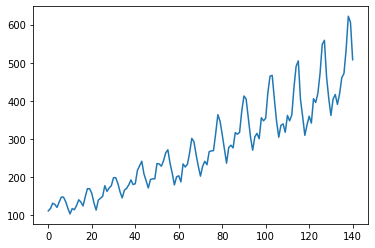

In [4]:
plt.plot(dataset)
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
dataset[:10,:]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [ ]:
train[:-1]

In [ ]:
[2,4,5,6,7,8,9,10]
[2,4,5,6,7,8,9]
[4,5,6,7,8,9,10]

In [33]:
len(train[:-1])

94

This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).


In [8]:
trainX=train[:-1]
trainY=train[1:]

testX=test[:-1]
testY=test[1:]

In [9]:
np.shape(trainX)

(93, 1)

In [10]:
np.shape(trainY)

(93, 1)

In [11]:
trainX[:10,:]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

LSTM input layer has the expectations of 3D inputs.
We can then use the reshape() function on the NumPy array to reshape 
this one-dimensional array into a three-dimensional array 
with first sample size, second time steps, and third feature at each time step.

In [12]:
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1])) 

In [13]:
np.shape(trainX)

(93, 1, 1)

Data is now ready to be used as input (X) to the LSTM with an input_shape of (second, third).

In [14]:
model = Sequential()
model.add(LSTM(5, input_shape=(np.shape(trainX[1,:])),return_sequences=True))
model.add(LSTM(10)),
model.add(Dense(1))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 5)              140       
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 791
Trainable params: 791
Non-trainable params: 0
_________________________________________________________________


A batch size of 1 means that the model will be fit using online training (as opposed to batch training or mini-batch training). As a result, it is expected that the model fit will have some variance.

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY[:,0], epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0354
Epoch 2/100
 - 0s - loss: 0.0167
Epoch 3/100
 - 0s - loss: 0.0150
Epoch 4/100
 - 0s - loss: 0.0135
Epoch 5/100
 - 0s - loss: 0.0115
Epoch 6/100
 - 0s - loss: 0.0095
Epoch 7/100
 - 0s - loss: 0.0075
Epoch 8/100
 - 0s - loss: 0.0055
Epoch 9/100
 - 0s - loss: 0.0040
Epoch 10/100
 - 0s - loss: 0.0030
Epoch 11/100
 - 0s - loss: 0.0026
Epoch 12/100
 - 0s - loss: 0.0024
Epoch 13/100
 - 0s - loss: 0.0022
Epoch 14/100
 - 0s - loss: 0.0022
Epoch 15/100
 - 0s - loss: 0.0022
Epoch 16/100
 - 0s - loss: 0.0022
Epoch 17/100
 - 0s - loss: 0.0022
Epoch 18/100
 - 0s - loss: 0.0024
Epoch 19/100
 - 0s - loss: 0.0022
Epoch 20/100
 - 0s - loss: 0.0022
Epoch 21/100
 - 0s - loss: 0.0022
Epoch 22/100
 - 0s - loss: 0.0023
Epoch 23/100
 - 0s - loss: 0.0021
Epoch 24/100
 - 0s - loss: 0.0022
Epoch 25/100
 - 0s - loss: 0.0022
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0023
Epoch 29/100
 - 0s - loss: 0.0023
Epoch 30/100
 - 0s - lo

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
trainPredict[:10,0]

array([0.02633306, 0.03644937, 0.06035342, 0.0551972 , 0.04153709,
       0.06552742, 0.08814309, 0.08814309, 0.06725595, 0.03814311],
      dtype=float32)

In [19]:
trainX[:10,0]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [20]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [21]:
np.shape(trainPredict)

(93, 1)

In [22]:
trainPredict[:10,0]

array([117.640526, 122.880775, 135.26308 , 132.59215 , 125.51622 ,
       137.94319 , 149.65811 , 149.65811 , 138.83858 , 123.75813 ],
      dtype=float32)

In [23]:
np.shape(trainY)

(93, 1)

In [24]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.01 RMSE
Test Score: 51.29 RMSE


In [25]:
np.shape(dataset)

(141, 1)

In [26]:
np.shape(testPredict)

(46, 1)

In [27]:
np.shape(trainPredict)

(93, 1)

In [29]:
len(dataset)-(len(trainPredict)+(2))

46

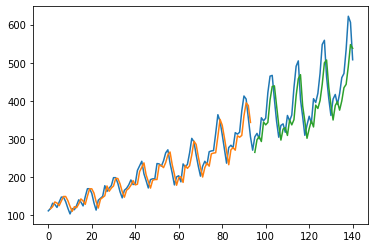

In [44]:
# shift test predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(1*2):len(dataset), :] = testPredict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()